# 0. Introduction
In this notebook, I will go through my solution and analysis of the Kaggle Titanic survival prediction competition. The aim of this competition is simple, given what we know about a passenger aboard the Titanic, can we predict whether or not this passenger has survived? In other words, we want to train a machine learning model to learn the relationship between passenger features and their survival outcome and subsequently make survival predictions on passenger data that our model has not seen before.

This is a classic beginner's project suited for anyone who is looking to gain some hands-on experience with data science and machine learning. I hope you will find some value out of this notebook.

I drew inspirations from the following notebooks in the making of this notebook:

Titanic Data Science Solutions by Manav Sehgal and chongjason914 
https://github.com/chongjason914/kaggle-titanic/blob/main/titanic-tutorial.ipynb

Kaggle competitions comprise of a minimum of 2 datasets that you can find and download from the competition webpage. The tow datasets are:

Training set ,
Test set

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

## 2.Import and read data

In [2]:
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3.Data Description

Here I will outline the definitions of the columns in the titanic dataset.
Survived: 0 = Did not survive, 1 = Survived

Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

Sex: Male or female

Age: Age in years, fractional if less than 1

SibSp: Number of siblings or spouses aboard the titanic

Parch: Number of parents or children aboard the titanic

Ticket: Passenger ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

## 4.Exploratory Data Analysis (EDA)

### 4.1 Data types, missing data and summary statistics

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [10]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 4.2 Feature analysis

In [13]:
# Categorical Variable -Sex

train['Sex'].value_counts(dropna= False)

male      577
female    314
Name: Sex, dtype: int64

In [14]:
# Mean of survival by sex

train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

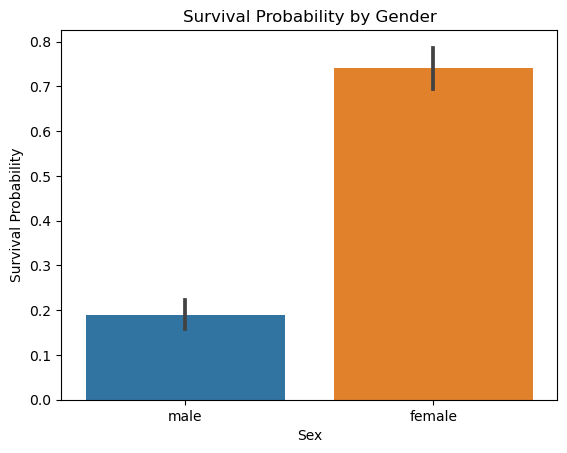

In [15]:
sns.barplot(x='Sex',y='Survived',data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

In [16]:
# Categorical Variable - Pclass

train['Pclass'].value_counts(dropna= False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

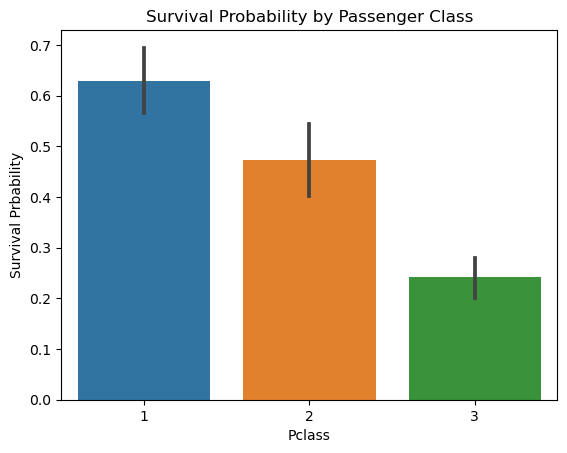

In [18]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel('Survival Prbability')
plt.title('Survival Probability by Passenger Class')

Text(0.5, 1.0, 'Survival Probability by Passenger Class')

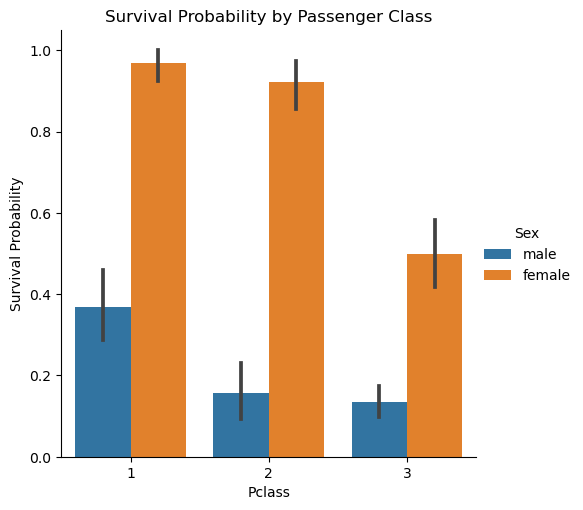

In [19]:
# Survival by gender and passenger class

sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=train ,kind='bar')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

In [20]:
# Categorical variable - Embarked

train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [21]:
# Mean of survival by point of embarkation

train[['Embarked','Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


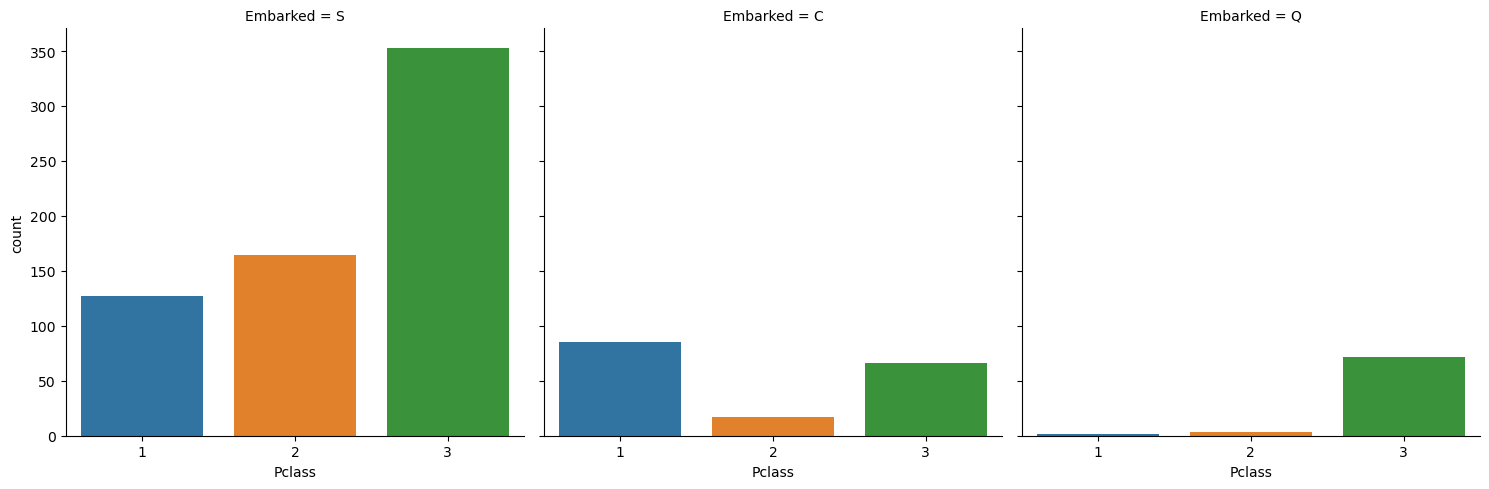

In [22]:
sns.factorplot('Pclass', col='Embarked', data = train , kind='count')

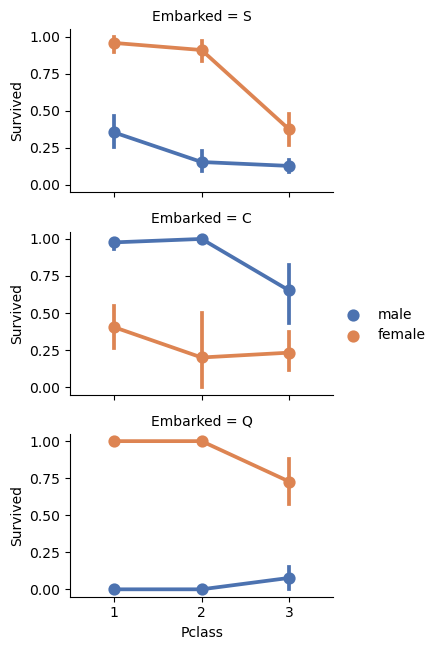

In [23]:
# Survival probability by all categorical variables

grid=sns.FacetGrid(train,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

### 4.2 Numberical Variables

In [24]:
# Detect and remove outliers in numerical variables

In [25]:
def detect_outliers(df, n, features):
    outlier_indices = []  # Create an empty list to store the outlier indices
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)  # Use the extend method to add the indices
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)


We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [26]:
# Outliers in numberical variables

train.loc[outliers_to_drop,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [27]:
#  Drop outliers and reset ndex

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


In [28]:
# Numerical Variables Correlation with survival

<AxesSubplot:>

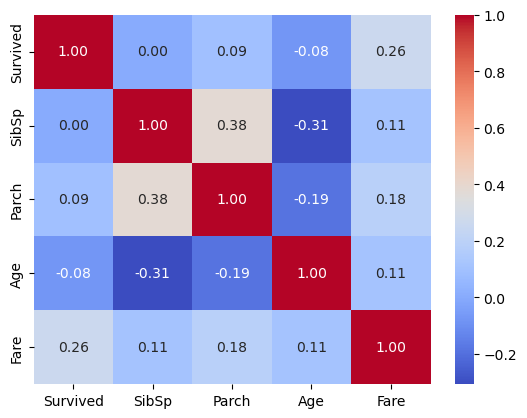

In [29]:
sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(), annot = True, fmt = '.2f', cmap='coolwarm')

In [30]:
# Numberical variable- sibsp
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [31]:
# Mean of survival by Sibsp

train[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived')

,Survived
SibSp,
5,0.000000
3,0.153846
4,0.166667
0,0.345395
2,0.464286
1,0.535885


Text(0.5, 1.0, 'Survival Probability by SibSp')

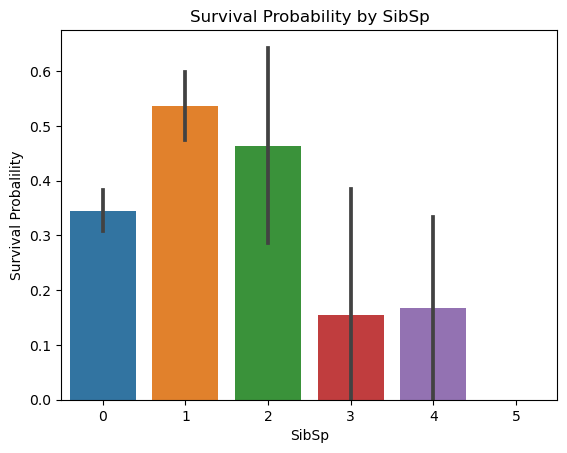

In [32]:
sns.barplot(x='SibSp',y='Survived',data = train)
plt.ylabel('Survival Probalility')
plt.title('Survival Probability by SibSp')

In [33]:
# Numberical variable - Parch

In [34]:
train['Parch'].value_counts(dropna=False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
# Mean of survival by parch

train[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived')

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.542857
1,0.550847
3,0.600000


Text(0.5, 1.0, 'Survival Probability by Parch')

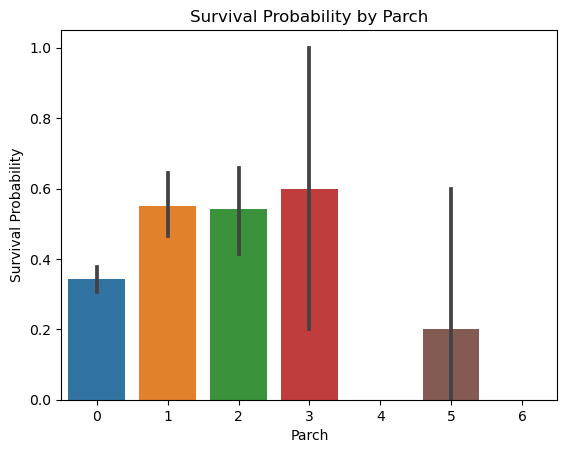

In [36]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

In [37]:
# Numerical variable- Age

train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

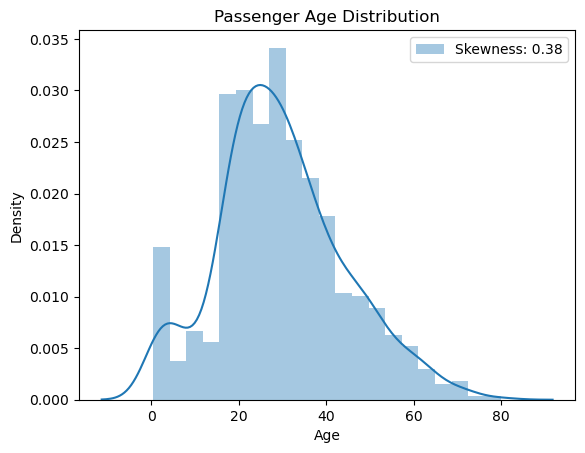

In [38]:
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

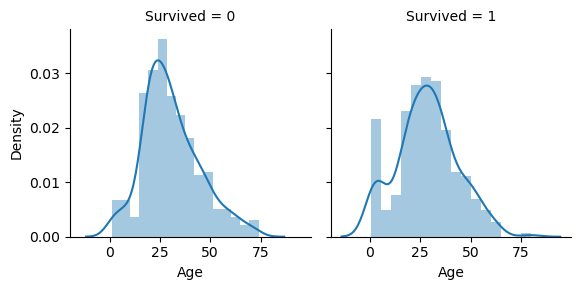

In [39]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

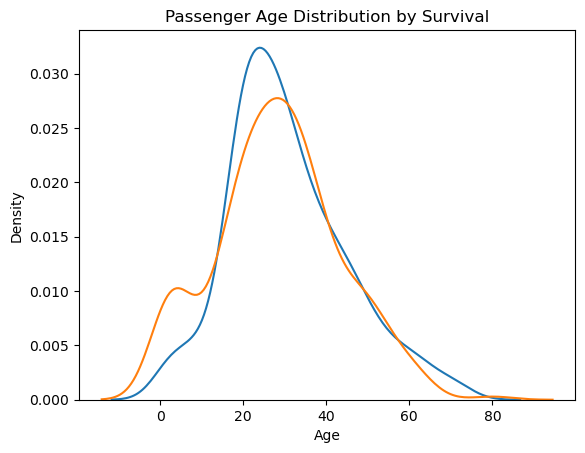

In [40]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [41]:
# Numberical variable- Fare

train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

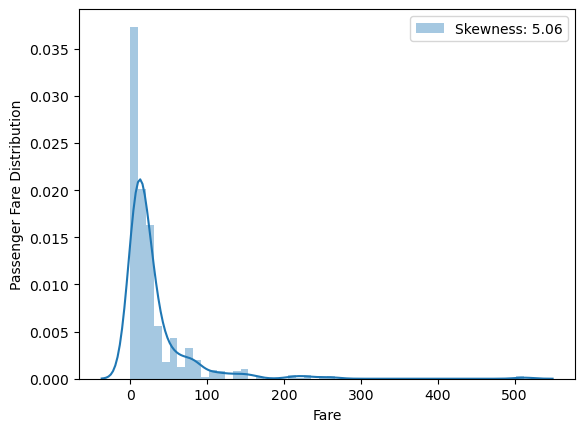

In [42]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

#  5. Data Preprocessing

## Drop & Fill the Values

In [43]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [44]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [45]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(train['Embarked'].mode(), inplace = True)

In [46]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [47]:
# Fill missing value in Fare with median

test['Fare'].fillna(test['Fare'].median(), inplace = True)

In [48]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [49]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
Embarked         2
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [50]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})


In [51]:
combine['Age'] = combine['Age'].fillna(method='pad')

In [52]:
combine['Age'].isnull().sum()

0

## Data Transformation

Text(0.5, 1.0, 'Passenger Fare Distribution')

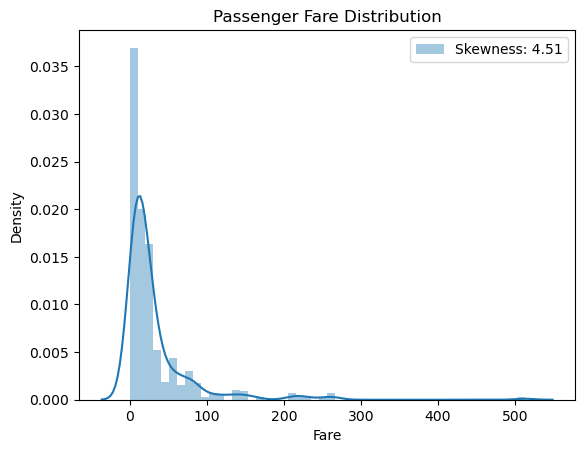

In [53]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')



Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

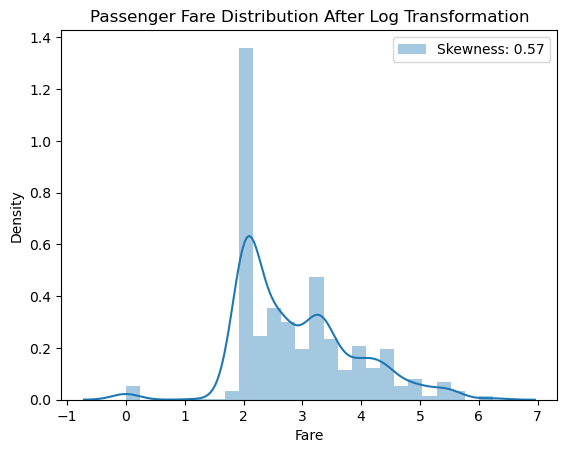

In [54]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')


## Feature Encoding

In [55]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [56]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')

In [57]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [58]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [59]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [60]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)


## Feature Engineering

In [61]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [62]:
combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [63]:
combine['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [64]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

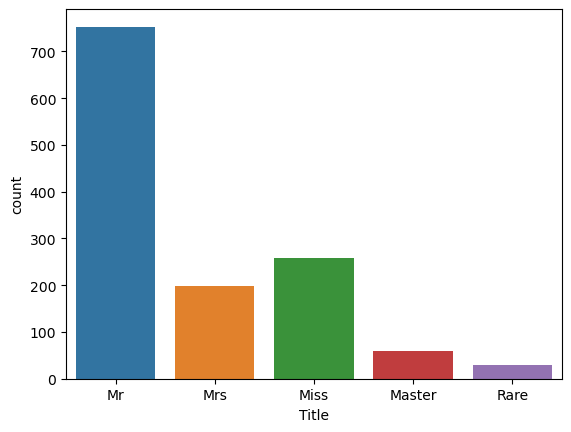

In [65]:
sns.countplot(combine['Title'])

In [66]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending=True)

,Title,Survived
2,Mr,0.157895
4,Rare,0.347826
0,Master,0.589744
1,Miss,0.711111
3,Mrs,0.793651


Text(0.5, 1.0, 'Mean of survival by Title')

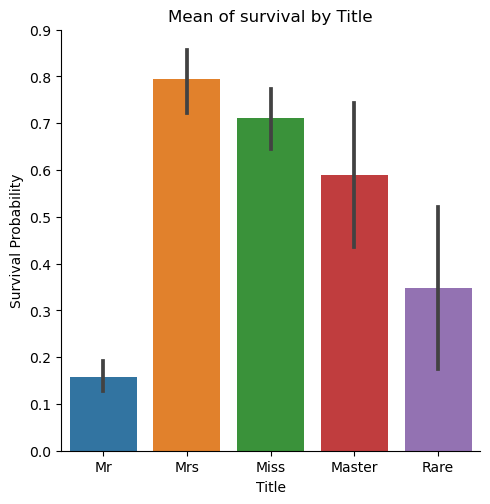

In [67]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [68]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S,Title
0,1,0.0,3,0,22.0,1,0,1,0,0,1,Mr
1,2,1.0,1,1,38.0,1,0,2,1,0,0,Mrs
2,3,1.0,3,1,26.0,0,0,1,0,0,1,Miss
3,4,1.0,1,1,35.0,1,0,2,0,0,1,Mrs
4,5,0.0,3,0,35.0,0,0,1,0,0,1,Mr


In [69]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [70]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending=True)

,FamilySize,Survived
7,8,0.000000
5,6,0.052632
4,5,0.200000
0,1,0.303538
6,7,0.333333
1,2,0.552795
2,3,0.578431
3,4,0.724138
8,11,NaN


In [71]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [72]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending=True)

,IsAlone,Survived
1,1,0.303538
0,0,0.514535


In [73]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Em_C,Em_Q,Em_S,Title,IsAlone
0,1,0.0,3,0,22.0,1,0,0,1,Mr,0
1,2,1.0,1,1,38.0,2,1,0,0,Mrs,0
2,3,1.0,3,1,26.0,1,0,0,1,Miss,1
3,4,1.0,1,1,35.0,2,0,0,1,Mrs,0
4,5,0.0,3,0,35.0,1,0,0,1,Mr,1


In [74]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.523438
1,"(16.136, 32.102]",0.342995
2,"(32.102, 48.068]",0.393305
3,"(48.068, 64.034]",0.390805
4,"(64.034, 80.0]",0.230769


In [75]:

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [76]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [77]:

# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes


Age       float64
Pclass      int64
dtype: object

In [78]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [79]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [80]:
combine = pd.get_dummies(combine, columns = ['Title'])

In [81]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [82]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Em_C,Em_Q,Em_S,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0.0,3,0,1,1,0,0,1,0,3,0,0,1,0,0
1,2,1.0,1,1,2,2,1,0,0,0,2,0,0,0,1,0
2,3,1.0,3,1,1,1,0,0,1,1,3,0,1,0,0,0
3,4,1.0,1,1,2,2,0,0,1,0,2,0,0,0,1,0
4,5,0.0,3,0,2,1,0,0,1,1,6,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0.0,2,0,1,1,0,0,1,1,2,0,0,0,0,1
877,888,1.0,1,1,1,2,0,0,1,1,1,0,1,0,0,0
878,889,0.0,3,1,1,2,0,0,1,0,3,0,1,0,0,0
879,890,1.0,1,0,1,2,1,0,0,1,1,0,0,1,0,0


In [83]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Em_C,Em_Q,Em_S,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.0,3,0,1,1,0,0,1,0,3,0,0,1,0,0
1,1.0,1,1,2,2,1,0,0,0,2,0,0,0,1,0
2,1.0,3,1,1,1,0,0,1,1,3,0,1,0,0,0
3,1.0,1,1,2,2,0,0,1,0,2,0,0,0,1,0
4,0.0,3,0,2,1,0,0,1,1,6,0,0,1,0,0


In [84]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,Em_C,Em_Q,Em_S,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,1,1,0,0,1,0,3,0,0,1,0,0
1,1,1,1,2,2,1,0,0,0,2,0,0,0,1,0
2,1,3,1,1,1,0,0,1,1,3,0,1,0,0,0
3,1,1,1,2,2,0,0,1,0,2,0,0,0,1,0
4,0,3,0,2,1,0,0,1,1,6,0,0,1,0,0


In [85]:
test

,PassengerId,Survived,Pclass,Sex,Age,Fare,Em_C,Em_Q,Em_S,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
881,892,NaN,3,0,2,1,0,1,0,1,6,0,0,1,0,0
882,893,NaN,3,1,2,1,0,0,1,0,6,0,0,0,1,0
883,894,NaN,2,0,3,1,0,1,0,1,6,0,0,1,0,0
884,895,NaN,3,0,1,1,0,0,1,1,3,0,0,1,0,0
885,896,NaN,3,1,1,1,0,0,1,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,0,1,1,0,0,1,1,3,0,0,1,0,0
1295,1306,NaN,1,1,2,3,1,0,0,1,2,0,0,0,0,1
1296,1307,NaN,3,0,2,1,0,0,1,1,6,0,0,1,0,0
1297,1308,NaN,3,0,2,1,0,0,1,1,6,0,0,1,0,0


In [86]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test = test.drop('PassengerId', axis = 1)
test.head()

,Pclass,Sex,Age,Fare,Em_C,Em_Q,Em_S,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
881,3,0,2,1,0,1,0,1,6,0,0,1,0,0
882,3,1,2,1,0,0,1,0,6,0,0,0,1,0
883,2,0,3,1,0,1,0,1,6,0,0,1,0,0
884,3,0,1,1,0,0,1,1,3,0,0,1,0,0
885,3,1,1,1,0,0,1,0,3,0,0,0,1,0


# Modeling

In [87]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


In [88]:
X_train

,Pclass,Sex,Age,Fare,Em_C,Em_Q,Em_S,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,0,1,1,0,0,1,0,3,0,0,1,0,0
1,1,1,2,2,1,0,0,0,2,0,0,0,1,0
2,3,1,1,1,0,0,1,1,3,0,1,0,0,0
3,1,1,2,2,0,0,1,0,2,0,0,0,1,0
4,3,0,2,1,0,0,1,1,6,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,2,0,1,1,0,0,1,1,2,0,0,0,0,1
877,1,1,1,2,0,0,1,1,1,0,1,0,0,0
878,3,1,1,2,0,0,1,0,3,0,1,0,0,0
879,1,0,1,2,1,0,0,1,1,0,0,1,0,0


In [89]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.16

In [90]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.15

In [91]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.15